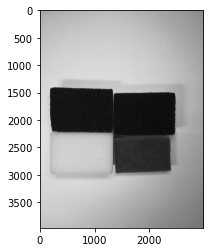

In [1]:
# ez a témalabon pandassal javított változat

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

DATADIR = "E:/Egyetem/5_felev/Temalab/jupyk/HF_classification_szivacs"
CATEGORIES = ['phase_1','phase_2','phase_3','phase_4']


#egy kép kiírása: (nyilván bonyolultabb, mint kéne, de itt meg van mutatva, hogy hogy is történik az olvasás)
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break #break nélkül az összeset mutatná
    break

In [2]:
print(img_array)

[[168 167 165 ... 135 132 131]
 [168 167 167 ... 133 130 129]
 [167 168 168 ... 132 131 132]
 ...
 [167 168 167 ... 112 113 114]
 [166 167 167 ... 115 118 119]
 [165 166 167 ... 118 120 121]]


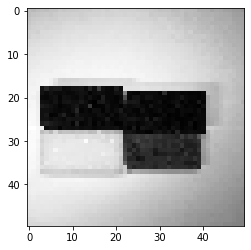

In [3]:
IMG_SIZE = 50

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [4]:
new_array.shape

(50, 50)

In [5]:
training_data = []

def create_training_data():
    errorcounter = 0
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #maradjon színes, ne állítsuk greyscale-re
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exeption as e:
                errorcounter+=1   #megnéztük, hogy volt-e error
    print(errorcounter)
            
create_training_data()

0


In [6]:
print(len(training_data))

489


In [10]:
#h ne sorszám alapján gondolkodjon
import random

random.shuffle(training_data)

In [13]:
target = [] #---> 0,1,2,3
data = [] #---->array

for features, label in training_data:
    data.append(features.flatten())  #a flatten miatt lesz a data egy dimenziós, amit a printnél láthatunk is
    target.append(label)

print(data[1].shape)

(2500,)


In [15]:
data[0]

array([137, 142, 143, ..., 140, 137, 132], dtype=uint8)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size=0.3)

In [17]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))

342
342
147


In [18]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [19]:
model.score(X_test, Y_test) #pontosság

1.0

[1]


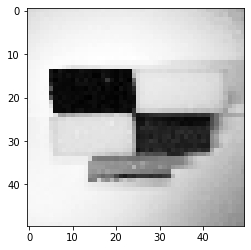

In [20]:
#megnézzük, hogy mit tippel egy bizonyos képre (hogy tényleg jól csinálja-e)
print(model.predict([X_test[2]]))
plt.imshow(X_test[2].reshape(50,50), cmap="gray")
plt.show()

In [21]:
# innentől már csak a confusion mátrixot készítjuk
Y_predicted = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predicted)
cm

array([[32,  0,  0,  0],
       [ 0, 52,  0,  0],
       [ 0,  0, 44,  0],
       [ 0,  0,  0, 19]], dtype=int64)

Text(69.0, 0.5, 'Truth')

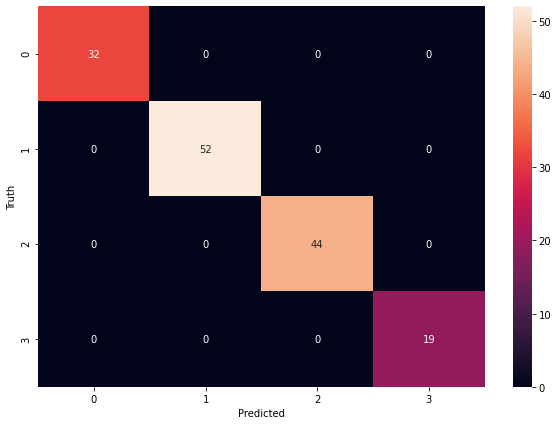

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')